In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path


In [138]:
BASE_DIR = Path.cwd().parent
file_path = BASE_DIR/'Datasets'/'airmiles.csv'
# print(file_path)

In [139]:
airmiles_df = pd.read_csv(file_path,dayfirst=True,parse_dates=['Date'],index_col='Date')
# airmiles_df['Date'] = pd.to_datetime(airmiles_df['Date'],format='%Y-%d-%m')
airmiles_df.head()

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


In [140]:
airmiles_df.index.freq = 'MS'

In [141]:
airmiles_df.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq='MS')

In [142]:
airmiles_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 1996-01-01 to 2005-05-01
Freq: MS
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   airmiles  113 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


In [143]:
df = airmiles_df.copy()
df.rename(columns={'airmiles':'y'},inplace=True)

In [144]:
df.head()

,y
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391


### airmiles over years

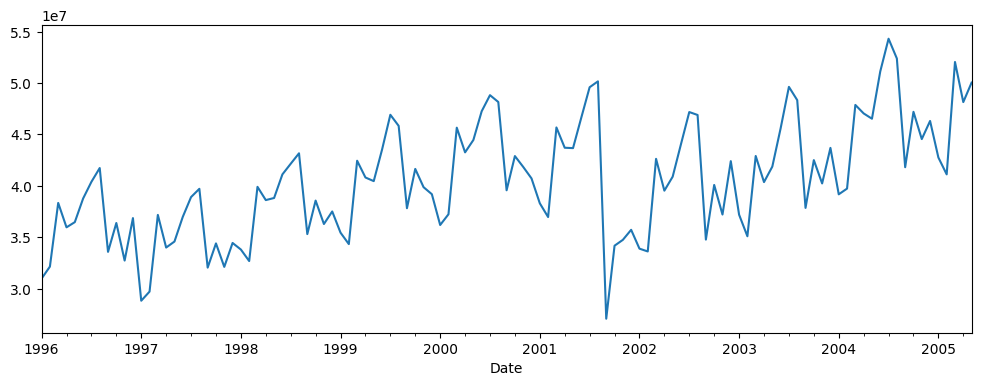

In [145]:
df.y.plot(figsize=(12,4))
plt.show()

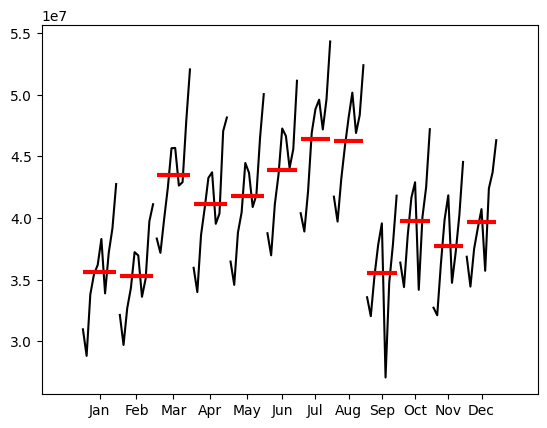

In [146]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

month_plot(df.y)
plt.show()

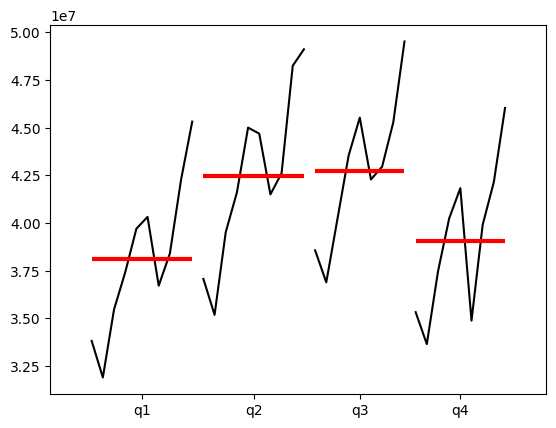

In [147]:
quarter_plot(df.y.resample('QS').mean())
plt.show()

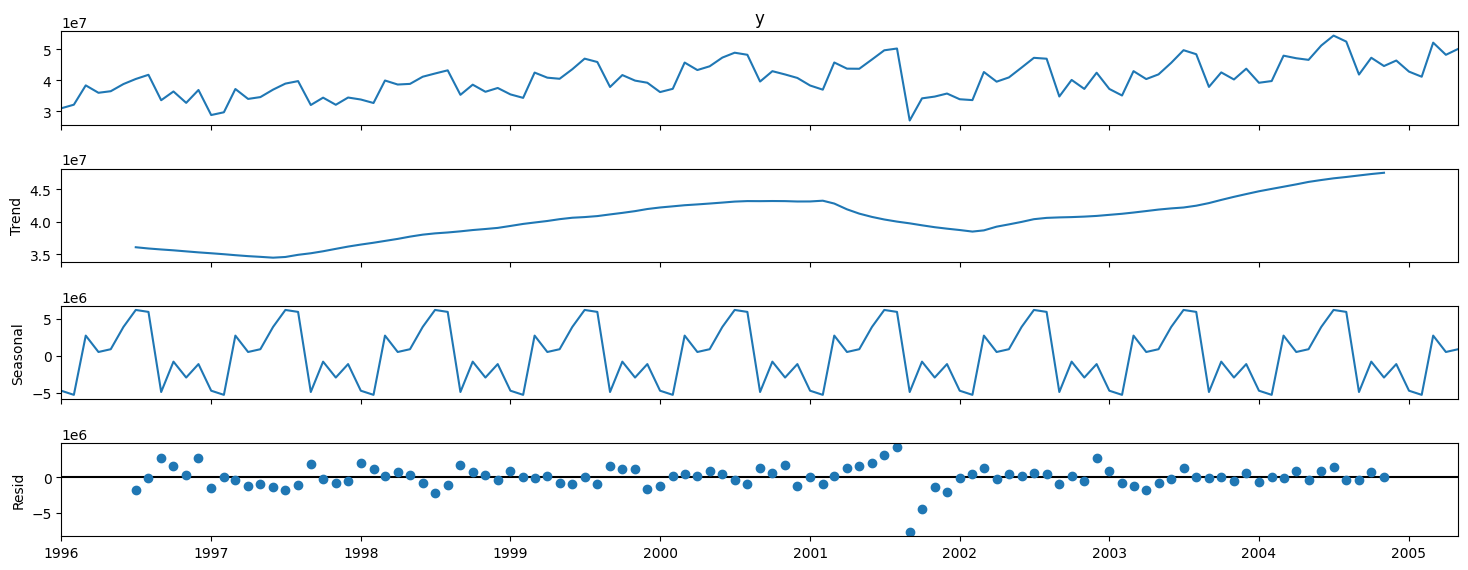

In [148]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(df.y,model='additive',period=12)
fig = decomposed.plot()
fig.set_size_inches(16,6)
plt.show()

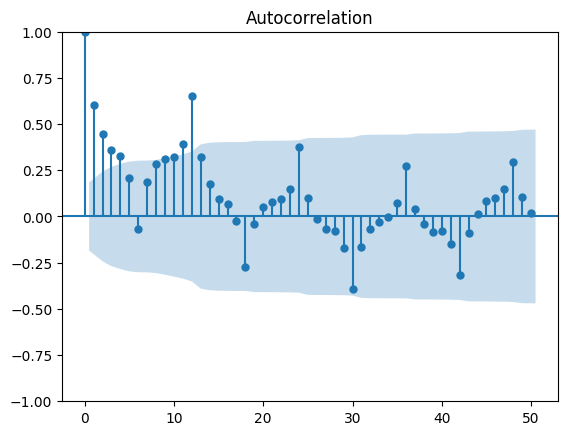

In [149]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df.y,lags=50)
plt.show()

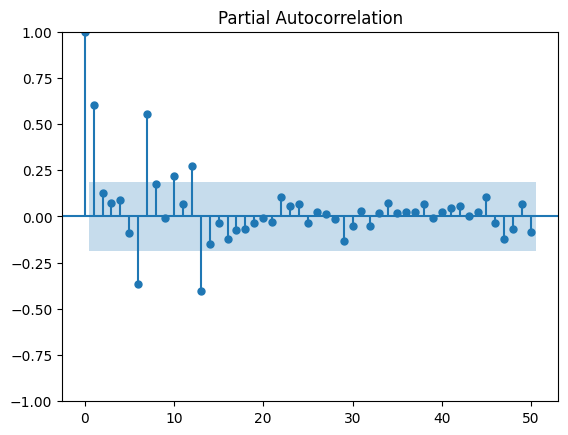

In [150]:
plot_pacf(df.y,lags=50)
plt.show()

In [151]:
periods = 12
train, test  = df.iloc[:-periods], df.iloc[-periods:]
print(train.shape, test.shape)

(101, 1) (12, 1)


In [152]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_es = ExponentialSmoothing(endog = train,
                                trend='add',
                                seasonal='mul',
                                seasonal_periods=12).fit()

forecast_es = model_es.forecast(steps=periods)
forecast_es

2004-06-01    5.010391e+07
2004-07-01    5.302285e+07
2004-08-01    5.304613e+07
2004-09-01    4.022381e+07
2004-10-01    4.509546e+07
2004-11-01    4.279716e+07
2004-12-01    4.494542e+07
2005-01-01    4.081431e+07
2005-02-01    4.045600e+07
2005-03-01    4.972900e+07
2005-04-01    4.726145e+07
2005-05-01    4.781031e+07
Freq: MS, dtype: float64

C:\Users\shiva\AppData\Local\Temp\ipykernel_23088\561080400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['forecast'] = forecast_es.rename('forecast')


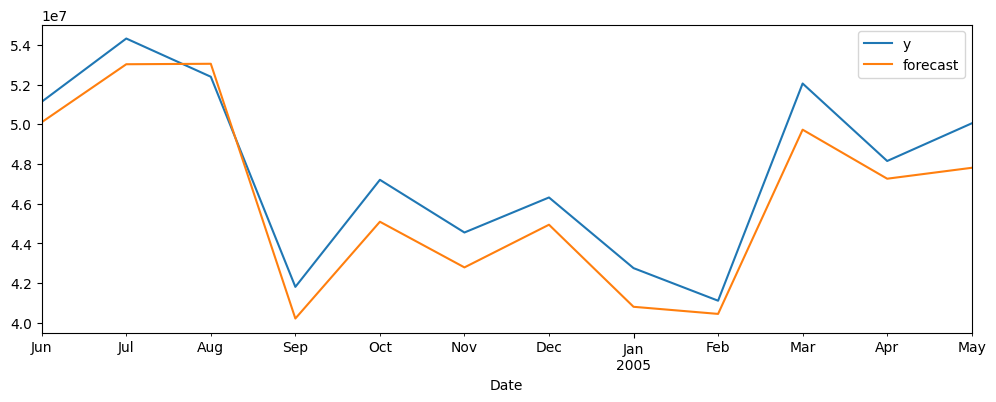

In [153]:
test['forecast'] = forecast_es.rename('forecast')
test[['y','forecast']].plot(figsize=(12,4))
plt.show()

In [154]:
test

,y,forecast
Date,,
2004-06-01,51134050,5.010391e+07
2004-07-01,54317314,5.302285e+07
2004-08-01,52392985,5.304613e+07
2004-09-01,41816777,4.022381e+07
2004-10-01,47205665,4.509546e+07
2004-11-01,44553653,4.279716e+07
2004-12-01,46316602,4.494542e+07
2005-01-01,42760657,4.081431e+07
2005-02-01,41120838,4.045600e+07


In [163]:
#access model performance using mean_squared_error, root_mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error

mse = mean_squared_error(test.y, test.forecast)
rmse = root_mean_squared_error(test.y, test.forecast)
mape = mean_absolute_percentage_error(test.y, test.forecast)
print(f'MSE: {mse},RMSE: {rmse},MAPE: {mape}')

MSE: 2545986934631.8096,RMSE: 1595614.9079999877,MAPE: 0.0314847979890774


In [156]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_es = ExponentialSmoothing(endog = df.y,
                                trend='add',
                                seasonal='mul',
                                seasonal_periods=12).fit()

forecast_es = model_es.forecast(steps=36)

In [157]:
forecast_es.head()

2005-06-01    5.340774e+07
2005-07-01    5.657708e+07
2005-08-01    5.631999e+07
2005-09-01    4.303756e+07
2005-10-01    4.832721e+07
Freq: MS, dtype: float64

In [158]:
# del full_df
full_df= pd.concat([df.y,forecast_es.rename('forecast_es')],axis=1).fillna(0)
full_df.tail()

,y,forecast_es
2008-01-01,0.0,4.659414e+07
2008-02-01,0.0,4.599333e+07
2008-03-01,0.0,5.678453e+07
2008-04-01,0.0,5.376936e+07
2008-05-01,0.0,5.460859e+07


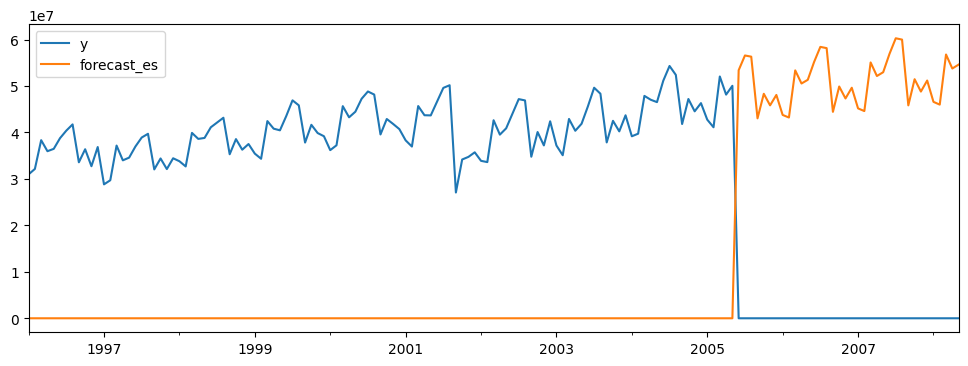

In [159]:
full_df[['y','forecast_es']].plot(figsize=(12,4))
plt.show()